<a href="https://colab.research.google.com/github/marciadevana/transjakarta/blob/main/transjakarta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import matplotlib.ticker as ticker

In [ ]:
# Original Google Sheets URL
sheet_url = 'https://docs.google.com/spreadsheets/d/1of6hmxsyIPVXEY0-ZFuYe1yZ7zZpjPKDp6YJ84jKlxY/edit?usp=sharing'

# Correct URL format for CSV export
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Read the CSV data into a DataFrame
data = pd.read_csv(csv_url)

# Display the DataFrame

In [ ]:
data.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [ ]:
data.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,1.800627e+14,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,...,106.84402,7,2023-04-03 5:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 6:00:53,3500.0
1,LGXO740D2N47GZ,4.885332e+15,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,...,106.83302,13,2023-04-03 5:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 6:40:01,3500.0
2,DJWR385V2U57TO,4.996225e+15,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,...,106.81435,38,2023-04-03 5:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 6:50:55,3500.0
3,JTUZ800U7C86EH,6.390992e+11,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,...,106.93526,23,2023-04-03 5:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 6:28:16,3500.0
4,VMLO535V7F95NJ,5.709282e+11,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,...,106.88900,5,2023-04-03 6:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 6:57:03,3500.0


In [ ]:
data

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,1.800627e+14,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,...,106.84402,7,2023-04-03 5:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 6:00:53,3500.0
1,LGXO740D2N47GZ,4.885332e+15,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,...,106.83302,13,2023-04-03 5:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 6:40:01,3500.0
2,DJWR385V2U57TO,4.996225e+15,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,...,106.81435,38,2023-04-03 5:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 6:50:55,3500.0
3,JTUZ800U7C86EH,6.390992e+11,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,...,106.93526,23,2023-04-03 5:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 6:28:16,3500.0
4,VMLO535V7F95NJ,5.709282e+11,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,...,106.88900,5,2023-04-03 6:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 6:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4.685818e+18,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6.502902e+15,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,2.131594e+14,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,3.778409e+14,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [ ]:
data.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

## **DATA CLEANING**

In [ ]:
# Data Cleaning

# 1. Handling missing values
# Checking for missing values
print("Missing values before cleaning:\n", data.isnull().sum())

Missing values before cleaning:
 transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64


In [ ]:
# For simplicity, we can fill missing numeric values with 0 and categorical with 'Unknown'
data['direction'].fillna(0, inplace=True)
data['tapInStops'].fillna('Unknown', inplace=True)
data['tapOutStops'].fillna('Unknown', inplace=True)
data['stopStartSeq'].fillna(0, inplace=True)
data['stopEndSeq'].fillna(0, inplace=True)

# Checking for missing values again
print("Missing values after cleaning:\n", data.isnull().sum())

Missing values after cleaning:
 transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops            0
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq             0
tapOutTime          1344
payAmount           1007
dtype: int64


In [ ]:
# 2. Ensuring correct data types
data['tapInTime'] = pd.to_datetime(data['tapInTime'])
data['tapOutTime'] = pd.to_datetime(data['tapOutTime'])

# 3. Removing duplicates
data.drop_duplicates(subset=['transID'], inplace=True)

In [ ]:
# Filter the data where payAmount is 3500
data_filtered = data[data['payAmount'] == 3500]

In [ ]:
# Calculate the duration of each trip
data_filtered['trip_duration'] = (data_filtered['tapOutTime'] - data_filtered['tapInTime']).dt.total_seconds() / 60  # duration in minutes

<ipython-input-290-8146147351af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['trip_duration'] = (data_filtered['tapOutTime'] - data_filtered['tapInTime']).dt.total_seconds() / 60  # duration in minutes


In [ ]:
# Calculate the number of passengers per corridor
passenger_count_per_corridor = data_filtered['corridorID'].value_counts().reset_index()
passenger_count_per_corridor.columns = ['corridorID', 'passenger_count']
passenger_count_per_corridor = passenger_count_per_corridor.sort_values(by='passenger_count')

passenger_count_per_corridor

,corridorID,passenger_count
107,M5,15
106,7B,16
104,2Q,41
105,1R,41
103,7P,50
...,...,...
4,6N,303
3,9D,310
2,8C,339
1,JIS3,341


In [ ]:
# Calculate the average trip duration per corridor
avg_trip_duration_per_corridor = data_filtered.groupby('corridorID')['trip_duration'].mean().reset_index()
avg_trip_duration_per_corridor.columns = ['corridorID', 'avg_trip_duration']
avg_trip_duration_per_corridor = avg_trip_duration_per_corridor.sort_values(by='avg_trip_duration', ascending=False)

avg_trip_duration_per_corridor

,corridorID,avg_trip_duration
63,7B,83.659375
19,1B,81.437011
79,9C,79.804224
35,3E,79.502881
39,4C,78.573574
...,...,...
55,6M,62.974528
12,12P,62.293590
92,M11,61.702033
68,7P,61.571631


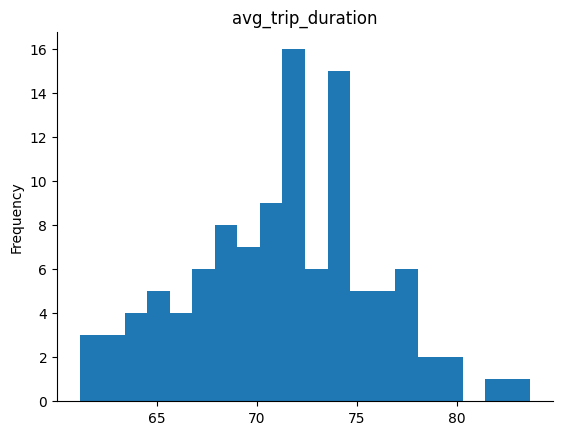

In [ ]:
# @title avg_trip_duration

from matplotlib import pyplot as plt
avg_trip_duration_per_corridor['avg_trip_duration'].plot(kind='hist', bins=20, title='avg_trip_duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
pass

In [ ]:
# Mengubah Tipe Data untuk Tap In dan Tap Out time, lalu membuat kolom tap in&out Hour dan juga Day
data_filtered['tapInTime'] = pd.to_datetime(data_filtered['tapInTime'])
data_filtered['tapOutTime'] = pd.to_datetime(data_filtered['tapOutTime'])
data_filtered['tapInHour'] = data_filtered['tapInTime'].dt.hour
data_filtered['tapOutHour'] = data_filtered['tapOutTime'].dt.hour
data_filtered['tapDay'] = data_filtered['tapInTime'].dt.dayofweek
data_filtered.head()

<ipython-input-18-e58521aae79e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['tapInTime'] = pd.to_datetime(data_filtered['tapInTime'])
<ipython-input-18-e58521aae79e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['tapOutTime'] = pd.to_datetime(data_filtered['tapOutTime'])
<ipython-input-18-e58521aae79e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,trip_duration,tapInHour,tapOutHour,tapDay
0,EIIW227B8L34VB,1.800627e+14,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,39.150000,5,6.0,0
1,LGXO740D2N47GZ,4.885332e+15,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,57.283333,5,6.0,0
2,DJWR385V2U57TO,4.996225e+15,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,51.816667,5,6.0,0
3,JTUZ800U7C86EH,6.390992e+11,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,...,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,43.416667,5,6.0,0
4,VMLO535V7F95NJ,5.709282e+11,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,...,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,39.466667,6,6.0,0


In [ ]:
# mengisi value untuk kolom tapDay
data_filtered['tapDay'] = data_filtered['tapDay'].replace({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'})
data_filtered.head()

<ipython-input-19-c17a3cda25d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['tapDay'] = data_filtered['tapDay'].replace({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'})


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,trip_duration,tapInHour,tapOutHour,tapDay
0,EIIW227B8L34VB,1.800627e+14,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,39.150000,5,6.0,Monday
1,LGXO740D2N47GZ,4.885332e+15,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,57.283333,5,6.0,Monday
2,DJWR385V2U57TO,4.996225e+15,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,51.816667,5,6.0,Monday
3,JTUZ800U7C86EH,6.390992e+11,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,...,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,43.416667,5,6.0,Monday
4,VMLO535V7F95NJ,5.709282e+11,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,...,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,39.466667,6,6.0,Monday


**Koridor atau Rute Perjalanan**: Analisis rute yang paling ramai dan paling sepi, peak hours, dan peak days untuk mengevaluasi kinerja distribusi armada. Informasi ini dapat membantu *Transjakarta* mengoptimalkan distribusi armada.

Koridor / Rute Paling Ramai

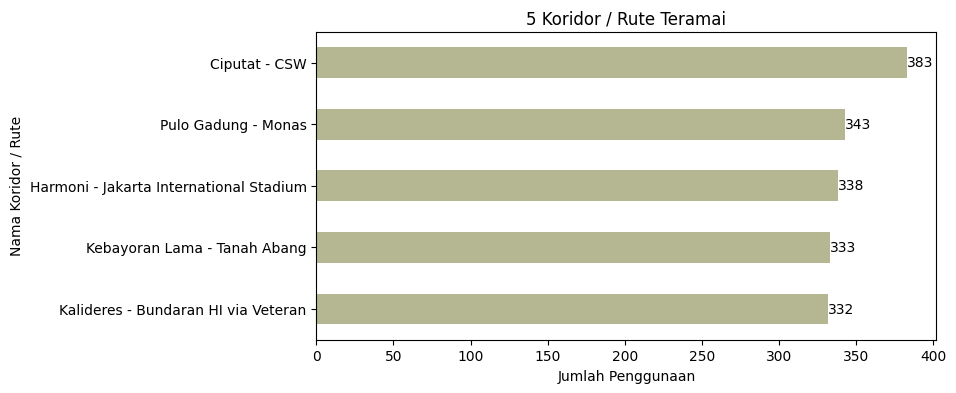

In [ ]:
top_koridor = data_filtered['corridorName'].value_counts().head(5)
top_koridor = top_koridor.sort_values(ascending=True)

plt.figure(figsize=(8, 4))

ax = top_koridor.plot(kind='barh', color='#B5B692')
plt.xlabel('Jumlah Penggunaan')
plt.ylabel('Nama Koridor / Rute')
plt.title('5 Koridor / Rute Teramai')

for bar in ax.containers:
    ax.bar_label(bar)

plt.show()

Dari grafik diatas, koridor / rute **Ciputat - CSW** menjadi rute teramai yang digunakan sebanyak **383** kali.

Koridor / Rute Perjalanan Paling Sepi

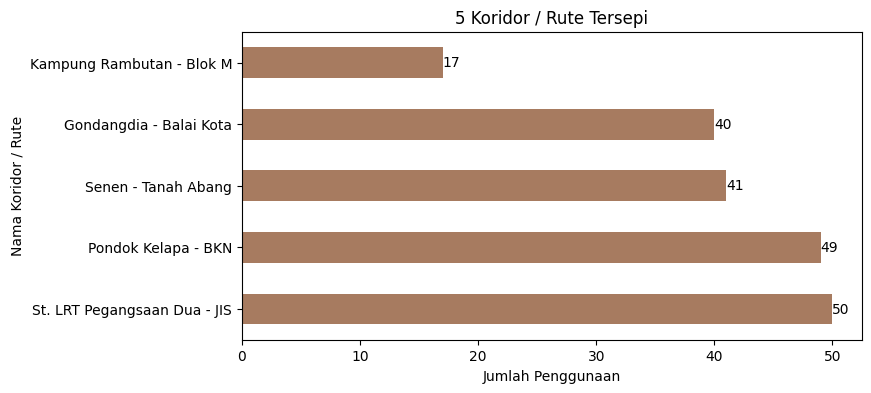

In [ ]:
rare_koridor = data_filtered['corridorName'].value_counts().tail(5)
rare_koridor = rare_koridor.sort_values(ascending=False)

plt.figure(figsize=(8, 4))

ax = rare_koridor.plot(kind='barh', color='#A77B60')
plt.xlabel('Jumlah Penggunaan')
plt.ylabel('Nama Koridor / Rute')
plt.title('5 Koridor / Rute Tersepi')

for bar in ax.containers:
    ax.bar_label(bar)

plt.show()

Dari grafik diatas, koridor / rute **Kampung Rambutan - Blom M** menjadi rute tersepi, hanya digunakan sebanyak **17** kali.


Peak Hours

In [ ]:
# Mengelompokkan data berdasarkan 'tapInHour' dan menghitung jumlah trip
grouped_data = data_filtered.groupby('tapInHour').size().reset_index(name='jumlah_trip')
grouped_data

,tapInHour,jumlah_trip
0,5,1794
1,6,2872
2,7,1321
3,8,1316
4,9,1342
5,10,152
6,11,162
7,12,163
8,13,159
9,14,80


In [ ]:
# Membuat DataFrame dengan semua jam dari 0 hingga 23
all_hours = pd.DataFrame({'tapInHour': range(24)})
all_hours

,tapInHour
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
# Gabungkan data yang ada dengan semua jam
grouped_data = all_hours.merge(grouped_data, on='tapInHour', how='left')
grouped_data['jumlah_trip'].fillna(0, inplace=True)
grouped_data = grouped_data.sort_values(by='tapInHour')
grouped_data

,tapInHour,jumlah_trip
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,1794.0
6,6,2872.0
7,7,1321.0
8,8,1316.0
9,9,1342.0


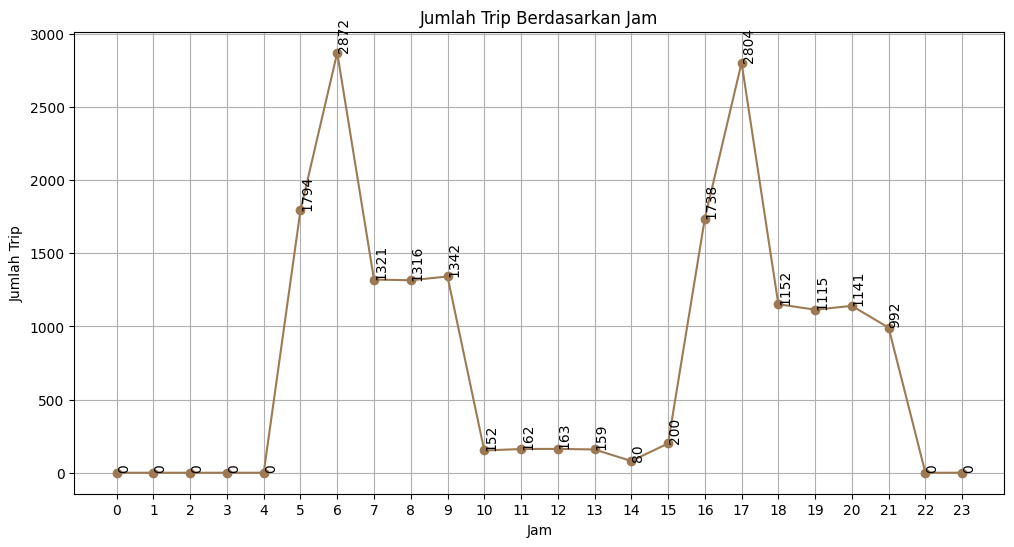

In [ ]:
# Membuat line chart
plt.figure(figsize=(12, 6))
plt.plot(grouped_data['tapInHour'], grouped_data['jumlah_trip'], marker='o', linestyle='-', color='#9D7A53')
plt.xlabel('Jam')
plt.ylabel('Jumlah Trip')
plt.title('Jumlah Trip Berdasarkan Jam')
plt.xticks(range(24))
plt.grid()

for i, j in zip(grouped_data['tapInHour'], grouped_data['jumlah_trip']):
    plt.text(i, j, str(int(j)), ha='left', va='bottom', rotation='vertical')

plt.show()

Dari grafik diatas, peak hour atau puncak jam kesibukan terdapat di **jam 6 pagi** dan **jam 5 sore**.

Weekend & Weekdays condition

In [ ]:
tap_Per_Day = data_filtered.groupby('tapDay')['tapDay'].value_counts().reset_index()
tap_Per_Day

,tapDay,count
0,Friday,3356
1,Monday,3341
2,Saturday,894
3,Sunday,880
4,Thursday,3340
5,Tuesday,3346
6,Wednesday,3346


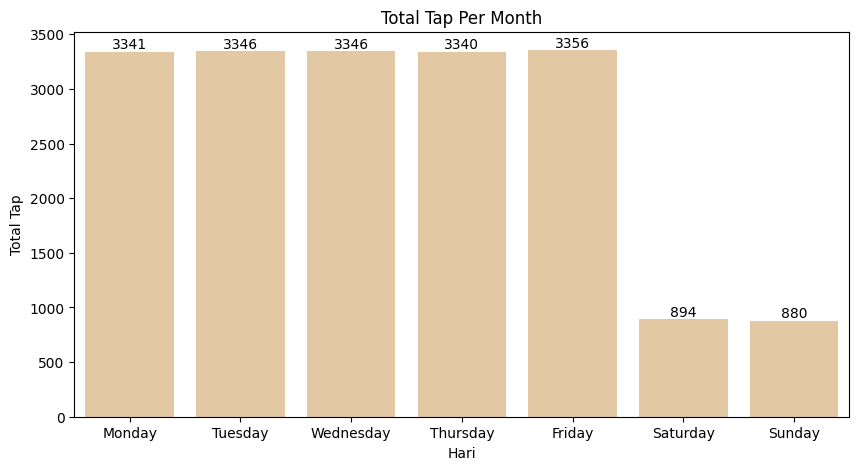

In [ ]:
# Menyesuaikan urutan hari dalam Bahasa Inggris
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Membuat bar plot
plt.figure(figsize=(10,5))
bars = sns.barplot(x = tap_Per_Day['tapDay'], y = tap_Per_Day['count'], order=day_order, color = '#ECCB98')
plt.title('Total Tap Per Month')
plt.xlabel('Hari')
plt.ylabel('Total Tap')
for bar in bars.containers:
    bars.bar_label(bar)
plt.show()

Dari grafik diatas, Peak Days atau puncak hari kesibukan terjadi pada saat **weekdays** dan cenderung sepi pada saat **Weekend**.

**Rekomendasi**
1. Peningkatan distribusi armada dan perbaikan layanan di rute ramai, khususnya ``Ciputat - CSW`` yang merupakan rute teramai. Perlu adanya armada dengan jumlah yang lebih banyak dibandingkan rute lainnya untuk mengurangi waktu tunggu. Selain itu perlu adanya pemeliharaan armada dan perbaikan halte yang baik.
2. Penambahan armada difokuskan pada peak hours ``jam 6 pagi dan jam 5 sore``sepanjang weekdays.
3. Pengurangan distribusi armada dilakukan di rute sepi, khususnya ``Kampung Rambutan - Blom M``  yang merupakan rute tersepi. Pengurangan armada secara keseluruhan dapat dilakukan saat weekend.

# **PROBLEM 2:**
**Bagaimana cara mengoptimalkan revenue seluruh layanan transjakarta?**

# **Framework :**
**Langkah 1: Pengumpulan Data**

Pastikan memiliki data lengkap

**Langkah 2: Pembersihan Data**

1. Hapus nilai duplikat dan tangani nilai kosong.
2. Konversi kolom waktu dan tanggal ke format datetime.
3. Pastikan kolom payAmount memiliki nilai numerik.

**Langkah 3: Analisis Pola Penggunaan**

1. Analisis waktu puncak dan rute yang paling sering digunakan.
2. Analisis demografi pengguna (misalnya, jenis kelamin dan usia).

--> Analisa jumlah penumpang per rute berdasarkan jenis kelamin

--> Analisa jumlah penumpang per halte berdasarkan jenis kelamin

**Langkah 4: Segmentasi Pelanggan**
1. Segmentasi berdasarkan frekuensi penggunaan (payCardID). --> bank/e-money
2. Segmentasi berdasarkan demografi (payCardSex, payCardBirthDate).

**Langkah 5: Evaluasi Harga dan Pendapatan**
1. Analisis distribusi harga tiket
2. Menghitung total revenue dan menganalisis kontribusi masing-masing rute.

In [ ]:
#Langkah 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  float64       
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  int64         
 9   tapInStops        37900 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

In [ ]:
#Langkah 2
# Hapus nilai duplikat dan tangani nilai kosong
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)


In [ ]:
#Langkah 2
# Konversi kolom waktu dan tanggal ke format datetime
data['tapInTime'] = pd.to_datetime(data['tapInTime'])
data['tapOutTime'] = pd.to_datetime(data['tapOutTime'])

In [ ]:
#Langkah 2
# Pastikan kolom payAmount memiliki nilai numerik
data['payAmount'] = pd.to_numeric(data['payAmount'], errors='coerce')

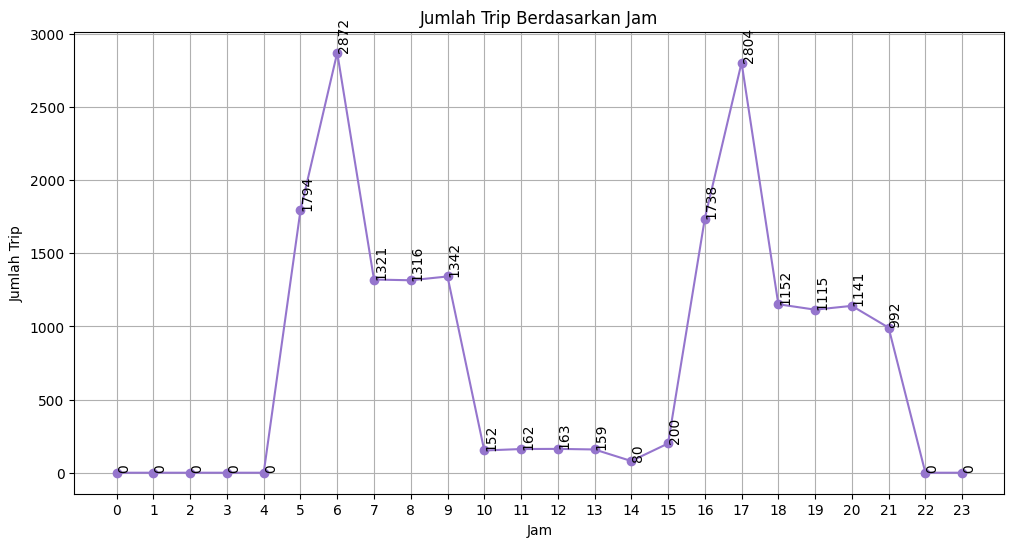

In [ ]:
# Peak Hours
# Mengelompokkan data berdasarkan 'tapInHour' dan menghitung jumlah trip
grouped_data = data_filtered.groupby('tapInHour').size().reset_index(name='jumlah_trip')

# Membuat DataFrame dengan semua jam dari 0 hingga 23
all_hours = pd.DataFrame({'tapInHour': range(24)})

# Gabungkan data yang ada dengan semua jam
grouped_data = all_hours.merge(grouped_data, on='tapInHour', how='left')
grouped_data['jumlah_trip'].fillna(0, inplace=True)
grouped_data = grouped_data.sort_values(by='tapInHour')

# Membuat line chart
plt.figure(figsize=(12, 6))
plt.plot(grouped_data['tapInHour'], grouped_data['jumlah_trip'], marker='o', linestyle='-', color='#9575CD')
plt.xlabel('Jam')
plt.ylabel('Jumlah Trip')
plt.title('Jumlah Trip Berdasarkan Jam')
plt.xticks(range(24))
plt.grid()

for i, j in zip(grouped_data['tapInHour'], grouped_data['jumlah_trip']):
    plt.text(i, j, str(int(j)), ha='left', va='bottom', rotation='vertical')

plt.show()

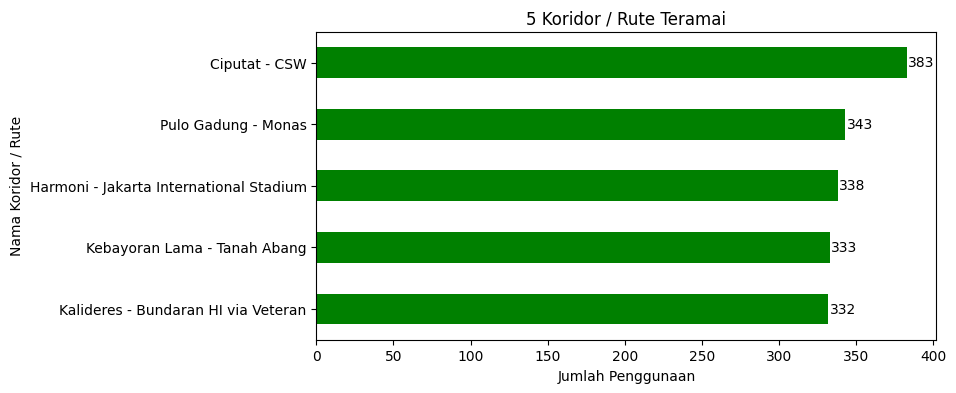

In [ ]:
# Mengambil beberapa rute teratas
top_koridor = data_filtered['corridorName'].value_counts().head(5)
top_koridor = top_koridor.sort_values(ascending=True)

plt.figure(figsize=(8, 4))

ax = top_koridor.plot(kind='barh', color='green')
plt.xlabel('Jumlah Penggunaan')
plt.ylabel('Nama Koridor / Rute')
plt.title('5 Koridor / Rute Teramai')

for i, v in enumerate(top_koridor):
    ax.text(v + 1, i, str(v), va='center', fontsize=10, color='black')

plt.show()

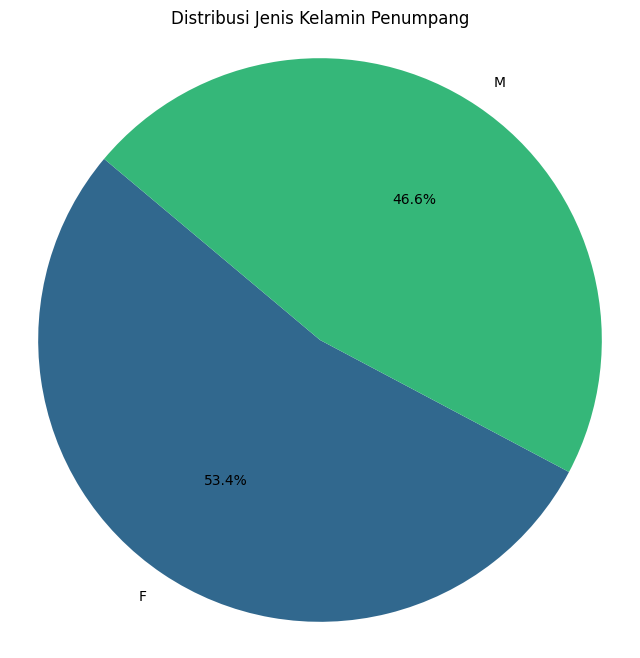

In [ ]:
#Langkah 3 (Analisis demografi pengguna, part 1)
# Menghitung jumlah penumpang berdasarkan jenis kelamin
gender_counts = data['payCardSex'].value_counts()

# Visualisasi distribusi jenis kelamin penumpang
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(gender_counts)))
plt.title('Distribusi Jenis Kelamin Penumpang')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

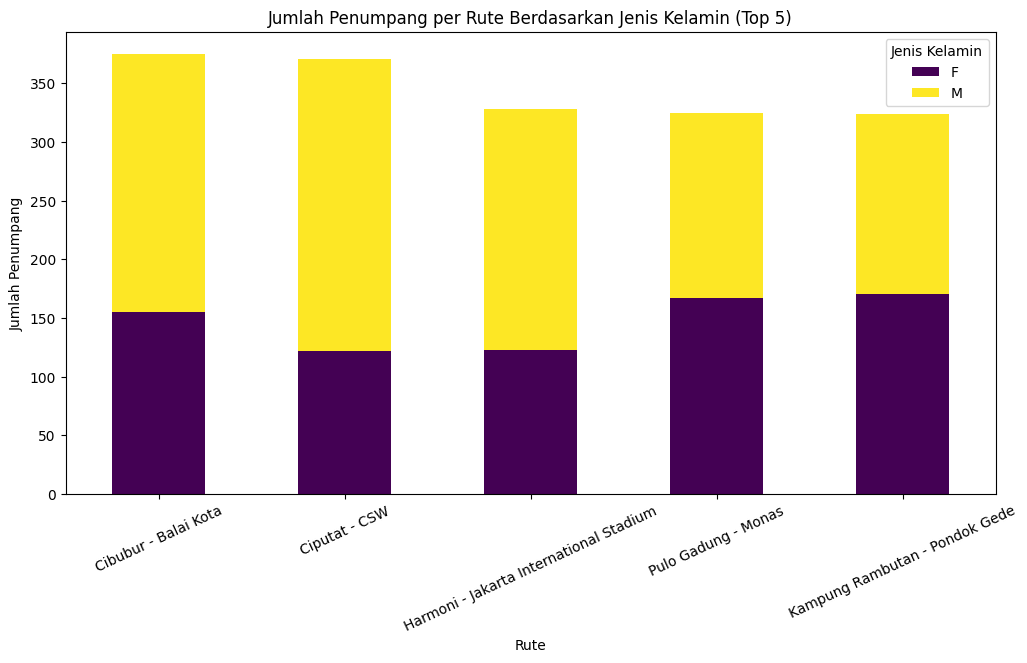

In [ ]:
#Langkah 3 (Analisis demografi pengguna, part 2)

# Menghitung jumlah penumpang per rute
rute_counts = data['corridorName'].value_counts()

# Menghitung jumlah penumpang per rute berdasarkan jenis kelamin
rute_gender_counts = data.groupby(['corridorName', 'payCardSex']).size().unstack(fill_value=0)

# Mengambil beberapa rute teratas berdasarkan total penumpang
top_n = 5
top_rute_gender_counts = rute_gender_counts.loc[rute_counts.head(top_n).index]

# Visualisasi rute yang paling ramai berdasarkan jenis kelamin
top_rute_gender_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Jumlah Penumpang per Rute Berdasarkan Jenis Kelamin (Top 5)')
plt.xlabel('Rute')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=25)
plt.legend(title='Jenis Kelamin')
plt.show()

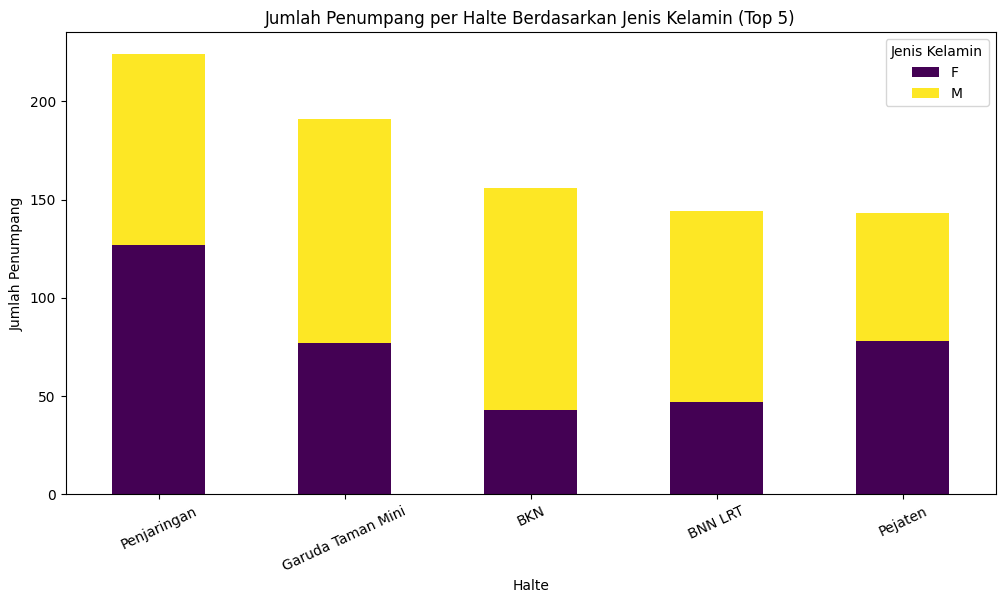

In [ ]:
# Menghitung jumlah penumpang per halte
halte_counts = data['tapInStopsName'].value_counts()

# Menghitung jumlah penumpang per halte berdasarkan jenis kelamin
halte_gender_counts = data.groupby(['tapInStopsName', 'payCardSex']).size().unstack(fill_value=0)

# Mengambil beberapa halte teratas berdasarkan total penumpang
top_n_halte = 5
top_halte_gender_counts = halte_gender_counts.loc[halte_counts.head(top_n_halte).index]

# Visualisasi halte yang paling sering digunakan berdasarkan jenis kelamin
top_halte_gender_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Jumlah Penumpang per Halte Berdasarkan Jenis Kelamin (Top 5)')
plt.xlabel('Halte')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=25)
plt.legend(title='Jenis Kelamin')
plt.show()

<ipython-input-314-c7980bcfab3c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bank_counts.index, y=bank_counts.values, palette='viridis')


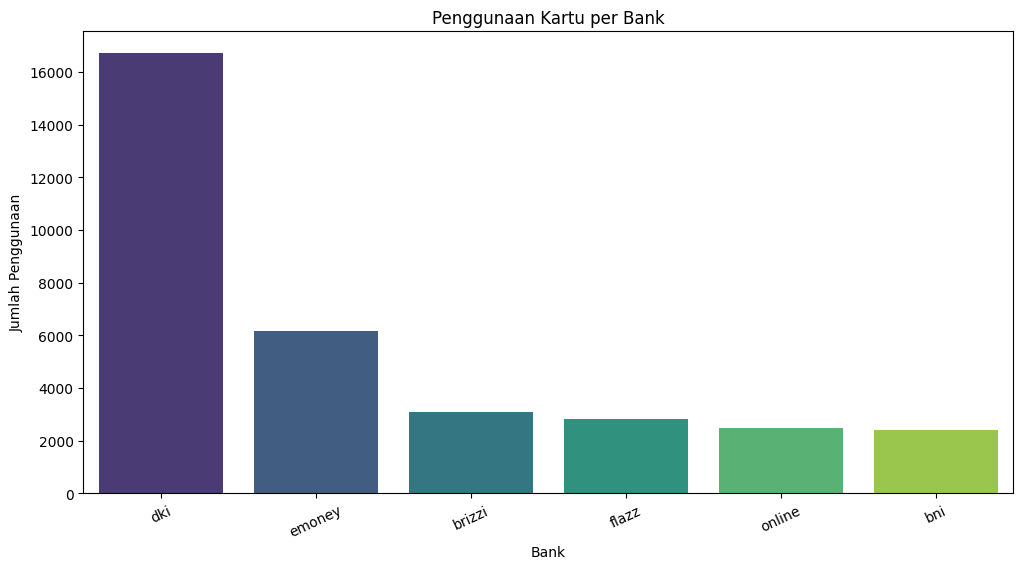

In [ ]:
# Langkah 4 (Segmentasi berdasarkan frekuensi penggunaan (payCardID). --> bank/e-money)
# Menghitung jumlah penggunaan kartu per bank
bank_counts = data['payCardBank'].value_counts()

# Visualisasi penggunaan kartu per bank
plt.figure(figsize=(12, 6))
sns.barplot(x=bank_counts.index, y=bank_counts.values, palette='viridis')
plt.xticks(rotation=25)
plt.title('Penggunaan Kartu per Bank')
plt.xlabel('Bank')
plt.ylabel('Jumlah Penggunaan')
plt.show()

In [ ]:
#Langkah 4 (Segmentasi berdasarkan demografi (payCardSex, payCardBirthDate))
# Konversi kolom waktu dan tanggal ke format datetime
data['tapInTime'] = pd.to_datetime(data['tapInTime'])
data['tapOutTime'] = pd.to_datetime(data['tapOutTime'])

# Pastikan kolom payAmount memiliki nilai numerik
data['payAmount'] = pd.to_numeric(data['payAmount'], errors='coerce')

# Tambahkan kolom 'serviceType' berdasarkan payAmount
def classify_service(payAmount):
    if payAmount == 3500:
        return 'TransJakarta'
    elif payAmount == 20000:
        return 'Royal Trans'
    elif payAmount == 0:
        return 'JakLingko'
    else:
        return 'Unknown'

data['serviceType'] = data['payAmount'].apply(classify_service)

# Hitung usia dari tanggal lahir
current_year = pd.to_datetime('now').year
data['age'] = current_year - data['payCardBirthDate']

# Segmentasi berdasarkan jenis kelamin dan usia
demographic_segments = data.groupby(['payCardSex', 'age']).size().reset_index(name='count')

# Menampilkan hasil
print(demographic_segments.head())

  payCardSex  age  count
0          F   12    584
1          F   13    442
2          F   14    468
3          F   15    425
4          F   16    415


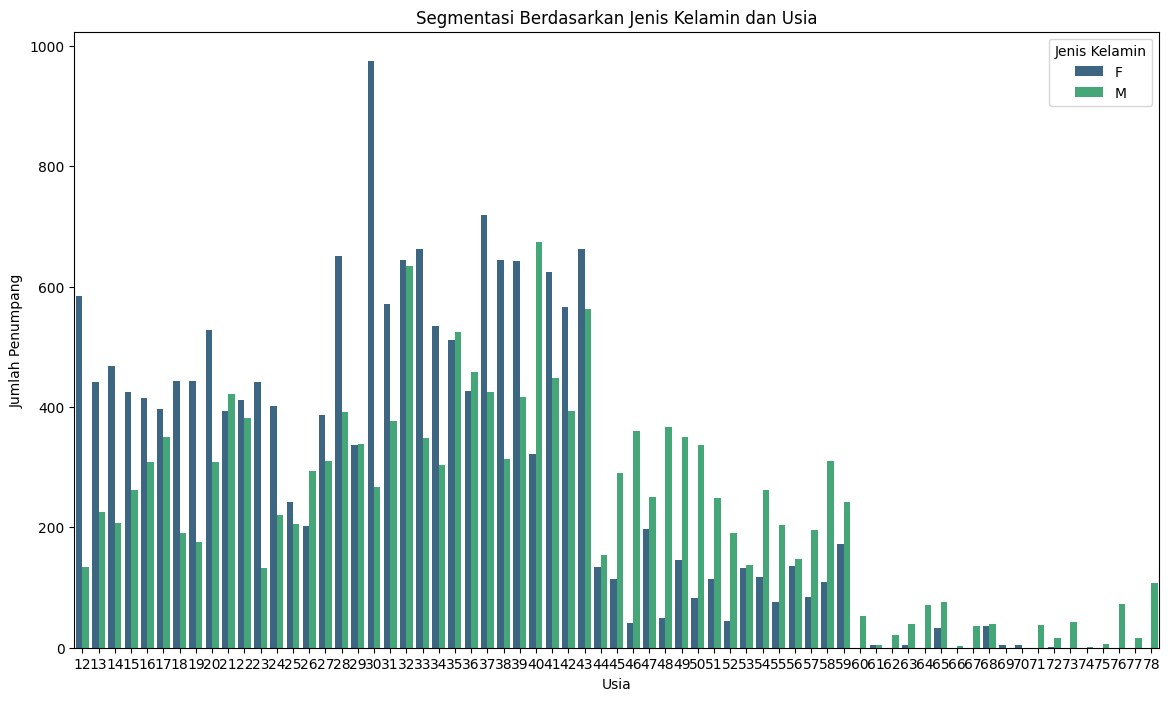

In [ ]:
# Membuat bar plot untuk segmentasi berdasarkan jenis kelamin dan usia

plt.figure(figsize=(14, 8))
sns.barplot(x='age', y='count', hue='payCardSex', data=demographic_segments, palette='viridis')
plt.title('Segmentasi Berdasarkan Jenis Kelamin dan Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')
plt.legend(title='Jenis Kelamin')
plt.show()

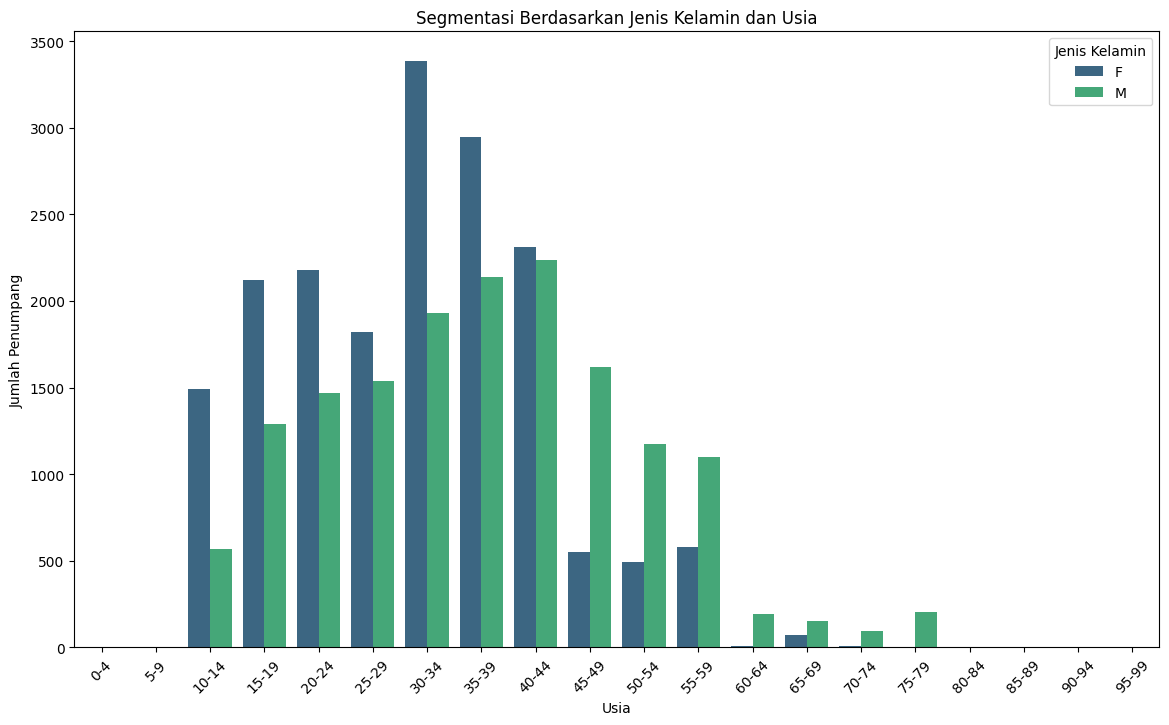

In [ ]:
# Misalkan demographic_segments adalah DataFrame dengan kolom 'age', 'count', dan 'payCardSex'

# Buat interval usia
bins = range(0, 101, 5)  # Interval 5 tahun dari 0 hingga 100
labels = [f'{i}-{i+4}' for i in bins[:-1]]
demographic_segments['age_group'] = pd.cut(demographic_segments['age'], bins=bins, labels=labels, right=False)

# Hitung jumlah penumpang berdasarkan age_group dan jenis kelamin
grouped_data = demographic_segments.groupby(['age_group', 'payCardSex']).agg({'count': 'sum'}).reset_index()

# Buat bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='age_group', y='count', hue='payCardSex', data=grouped_data, palette='viridis')
plt.title('Segmentasi Berdasarkan Jenis Kelamin dan Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')
plt.legend(title='Jenis Kelamin')
plt.xticks(rotation=45)  # Untuk memutar label usia jika perlu
plt.show()

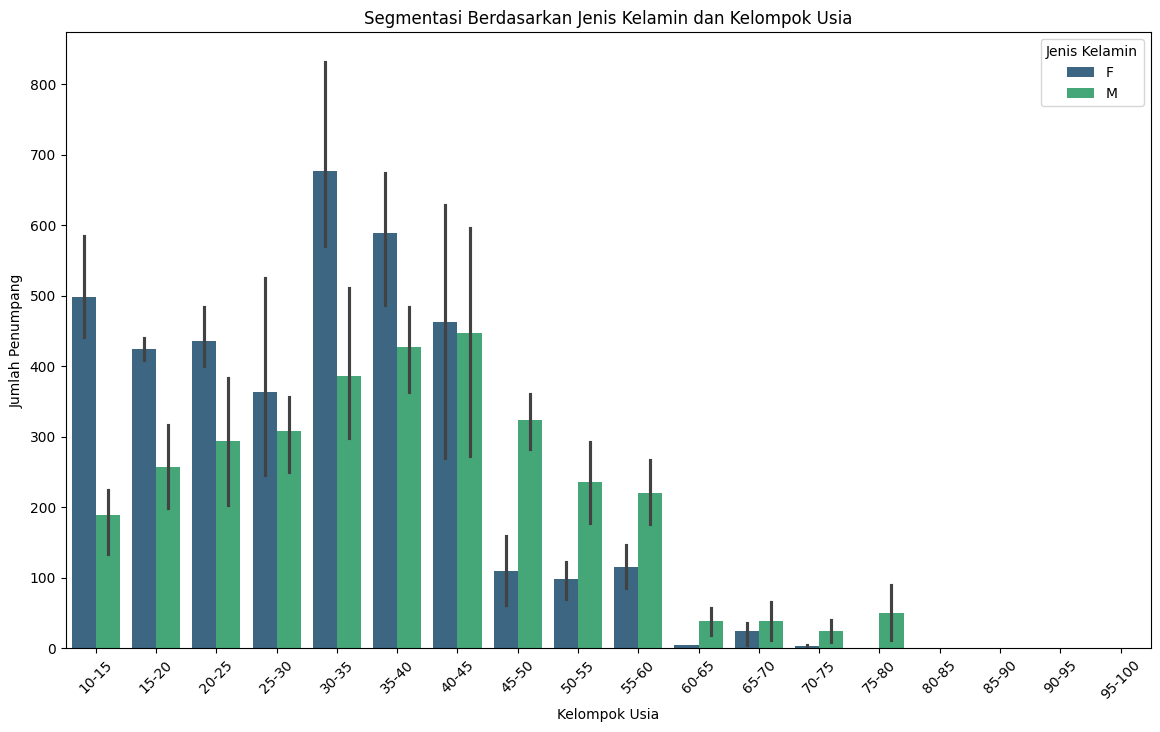

In [ ]:
# Misalkan demographic_segments adalah DataFrame Anda
# Tambahkan kolom baru untuk mengelompokkan usia dalam interval yang dimulai dari 10-15, 16-20, dst.
bins = list(range(10, 101, 5))  # Mengelompokkan usia dari 10 hingga 100 dengan interval 5 tahun
labels = [f'{i}-{i+5}' for i in range(10, 100, 5)]
demographic_segments['range_umur'] = pd.cut(demographic_segments['age'], bins=bins, labels=labels, right=False)

# Buat bar plot untuk segmentasi berdasarkan jenis kelamin dan kelompok usia
plt.figure(figsize=(14, 8))
sns.barplot(x='range_umur', y='count', hue='payCardSex', data=demographic_segments, palette='viridis')
plt.title('Segmentasi Berdasarkan Jenis Kelamin dan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Penumpang')
plt.legend(title='Jenis Kelamin')
plt.xticks(rotation=45)  # Memiringkan label sumbu x agar lebih mudah dibaca
plt.show()

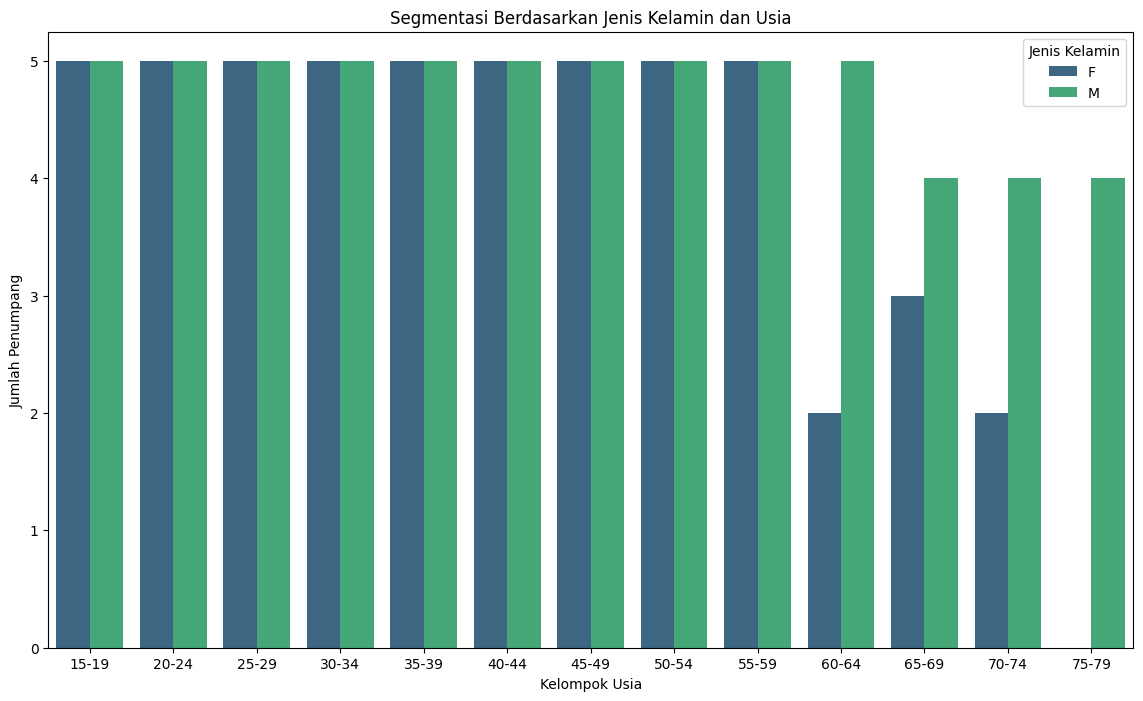

In [ ]:
# Assuming demographic_segments is your DataFrame and 'age' is the column with ages
bins = range(15, demographic_segments['age'].max() + 5, 5)
labels = [f"{i}-{i + 4}" for i in bins[:-1]]
demographic_segments['age_group'] = pd.cut(demographic_segments['age'], bins=bins, labels=labels, right=False)

# Calculate counts for each age group and gender
age_gender_counts = demographic_segments.groupby(['age_group', 'payCardSex']).size().reset_index(name='count')

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(x='age_group', y='count', hue='payCardSex', data=age_gender_counts, palette='viridis')
plt.title('Segmentasi Berdasarkan Jenis Kelamin dan Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Penumpang')
plt.legend(title='Jenis Kelamin')
plt.show()

   payCardSex  age  count age_group range_umur
18          F   30    975     30-34      30-35
25          F   37    719     35-39      35-40
83          M   40    675     40-44      40-45
31          F   43    663     40-44      40-45
21          F   33    662     30-34      30-35
16          F   28    651     25-29      25-30
20          F   32    645     30-34      30-35
26          F   38    644     35-39      35-40
27          F   39    643     35-39      35-40
75          M   32    634     30-34      30-35


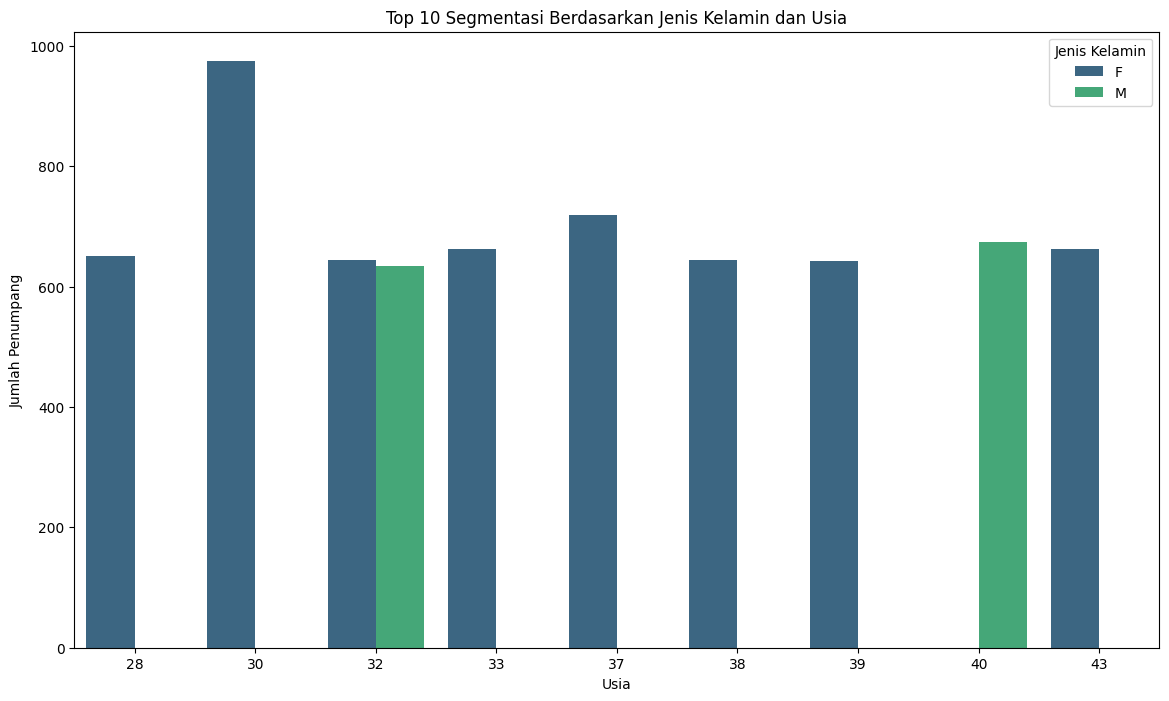

In [ ]:
# Mengurutkan dan memilih 10 segmen teratas
top_10_demographic_segments = demographic_segments.sort_values(by='count', ascending=False).head(10)

# Menampilkan hasil
print(top_10_demographic_segments)

# Membuat bar plot untuk 10 segmen teratas
plt.figure(figsize=(14, 8))
sns.barplot(x='age', y='count', hue='payCardSex', data=top_10_demographic_segments, palette='viridis')
plt.title('Top 10 Segmentasi Berdasarkan Jenis Kelamin dan Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')
plt.legend(title='Jenis Kelamin')
plt.show()

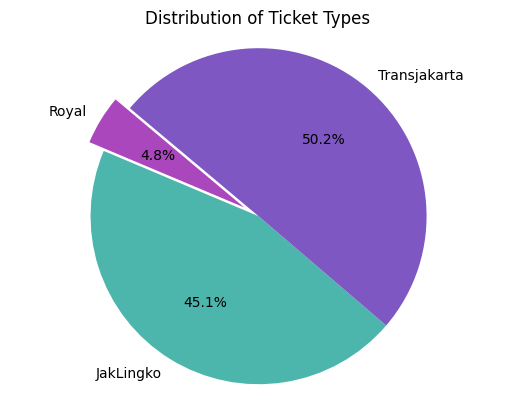

In [ ]:
#Langkah 5 (Analisis distribusi harga tiket )
# Membuat subset data berdasarkan filter payAmount
royal_data = data[data['payAmount'] == 20000]
jaklingko_data = data[data['payAmount'] == 0]
transjakarta_data = data[data['payAmount'] == 3500]

# Menghitung panjang dari masing-masing subset data
royal_count = len(royal_data)
jaklingko_count = len(jaklingko_data)
transjakarta_count = len(transjakarta_data)

# Membuat pie chart
labels = ['Royal', 'JakLingko', 'Transjakarta']
sizes = [royal_count, jaklingko_count, transjakarta_count]
colors = ['#AB47BC','#4DB6AC','#7E57C2']
explode = (0.1, 0, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ticket Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Langkah 5 (Menghitung total revenue)
# Menghitung jumlah penumpang dan total revenue untuk masing-masing kategori
transjakarta_revenue = transjakarta_data['payAmount'].sum()
jaklingko_revenue = jaklingko_data['payAmount'].sum()
royal_revenue = royal_data['payAmount'].sum()

transjakarta_count = transjakarta_data.shape[0]
jaklingko_count = jaklingko_data.shape[0]
royal_count = royal_data.shape[0]

print(f"Revenue Transjakarta: {transjakarta_revenue}, Jumlah Penumpang: {transjakarta_count}")
print(f"Revenue Jaklingko: {jaklingko_revenue}, Jumlah Penumpang: {jaklingko_count}")
print(f"Revenue Royal: {royal_revenue}, Jumlah Penumpang: {royal_count}")

total_revenue = data['payAmount'].sum()
print(f'Total Revenue: {total_revenue}')

Revenue Transjakarta: 59090500.0, Jumlah Penumpang: 16883
Revenue Jaklingko: 0.0, Jumlah Penumpang: 15172
Revenue Royal: 32040000.0, Jumlah Penumpang: 1602
Total Revenue: 91130500.0


In [ ]:
# Menghitung total revenue per rute
total_revenue_per_route = data.groupby('corridorName')['payAmount'].sum().reset_index()
total_revenue_per_route.columns = ['corridorName', 'totalRevenue']

# Menghitung total revenue keseluruhan
total_revenue_overall = total_revenue_per_route['totalRevenue'].sum()

# Menghitung persentase kontribusi masing-masing rute
total_revenue_per_route['percentageContribution'] = (total_revenue_per_route['totalRevenue'] / total_revenue_overall) * 100

<ipython-input-324-4a9f94d6001a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percentageContribution', y='corridorName', data=top_10_routes, palette='viridis')


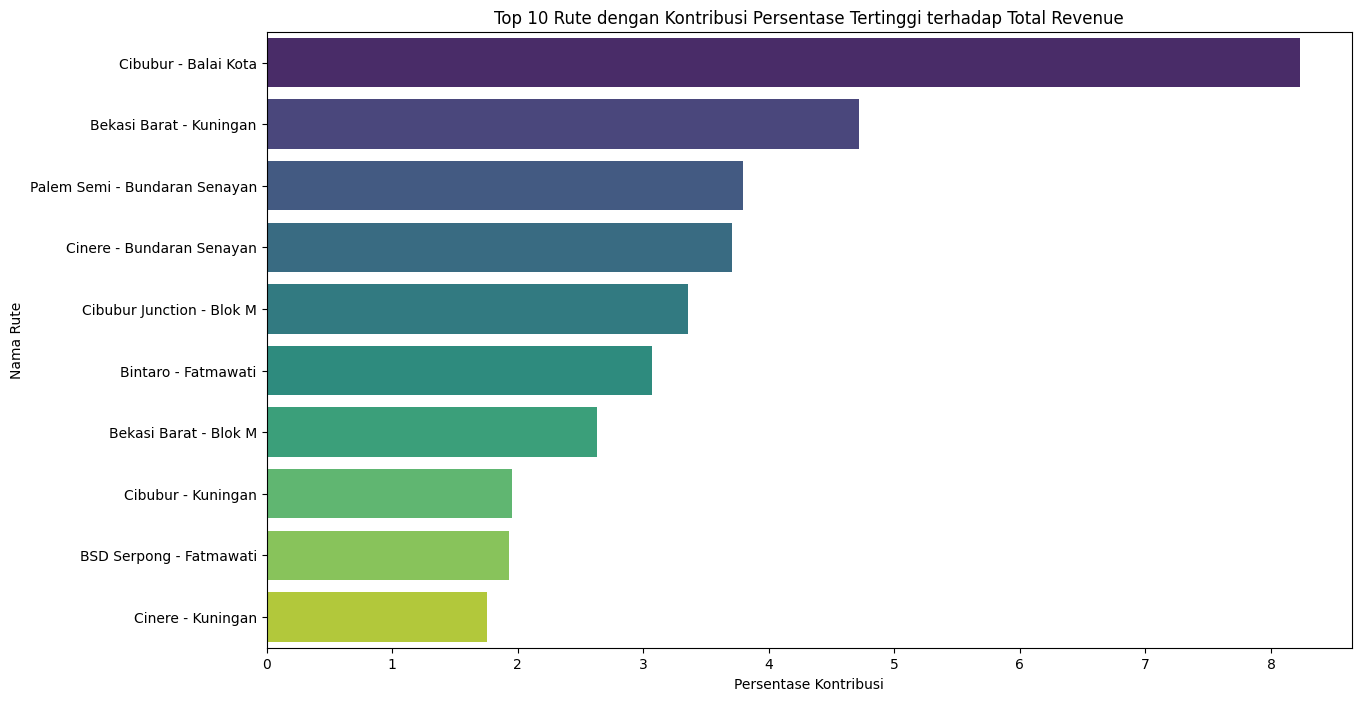

In [ ]:
# Mengambil 10 rute teratas berdasarkan kontribusi persentase
top_10_routes = total_revenue_per_route.sort_values(by='percentageContribution', ascending=False).head(10)

# Membuat bar plot untuk 10 rute teratas
plt.figure(figsize=(14, 8))
sns.barplot(x='percentageContribution', y='corridorName', data=top_10_routes, palette='viridis')
plt.title('Top 10 Rute dengan Kontribusi Persentase Tertinggi terhadap Total Revenue')
plt.xlabel('Persentase Kontribusi')
plt.ylabel('Nama Rute')
plt.show()

**Analisa penumpang pada weekend dan weekdays**

In [ ]:
# Convert tapInTime and tapOutTime to datetime
data['tapInTime'] = pd.to_datetime(data['tapInTime'], errors='coerce')
data['tapOutTime'] = pd.to_datetime(data['tapOutTime'], errors='coerce')

In [ ]:
# Extract day information
data['dayOfWeek'] = data['tapInTime'].dt.day_name()

In [ ]:
# Group by day of the week and count trips
daily_trips = data.groupby('dayOfWeek').size().reset_index(name='trip_count')

In [ ]:
# To ensure days of the week are in correct order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trips['dayOfWeek'] = pd.Categorical(daily_trips['dayOfWeek'], categories=ordered_days, ordered=True)
daily_trips = daily_trips.sort_values('dayOfWeek').reset_index()
daily_trips

,index,dayOfWeek,trip_count
0,1,Monday,6052
1,5,Tuesday,6098
2,6,Wednesday,6048
3,4,Thursday,6063
4,0,Friday,6106
5,2,Saturday,1622
6,3,Sunday,1668


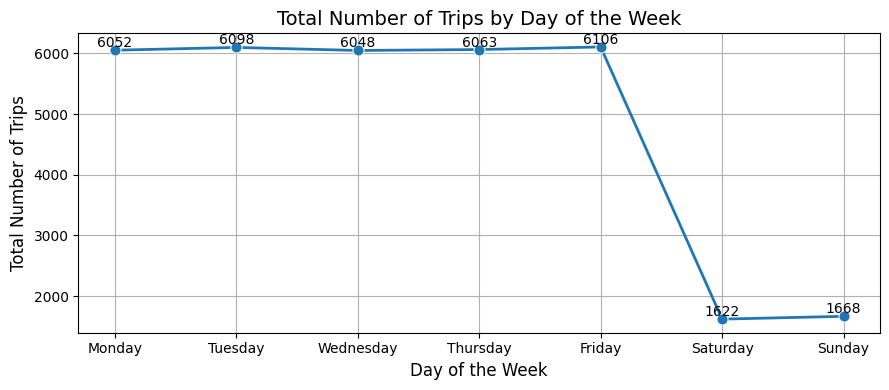

In [ ]:
# Plot the total trips by day of the week as a line chart
plt.figure(figsize=(9, 4))
line_plot = sns.lineplot(x='dayOfWeek', y='trip_count', data=daily_trips, marker='o', markersize=8, linewidth=2)

# Add detail values to the line chart
for index, row in daily_trips.iterrows():
    plt.text(index, row.trip_count, f'{row.trip_count}', color='black', ha="center", va="bottom", fontsize=10)

plt.title('Total Number of Trips by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Number of Trips', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()

plt.show()

**Problem**
- Berdasarkan grafik tersebut, pada hari Sabtu dan Minggu (weekend) terjadi penurunan drastis untuk pengguna bus-bus dari PT Transjakarta.

**Rekomendasi**
- Menawarkan tiket spesial *weekend* untuk pembelian tiket bus Transjakarta 5 gratis 1
- Diskon 25% untuk tiket bus Royaltrans di hari Sabtu dan Minggu
- Hanya mengoperasikan bus Transjakarta dan Royaltrans di hari Sabtu dan Minggu

AGE GROUP

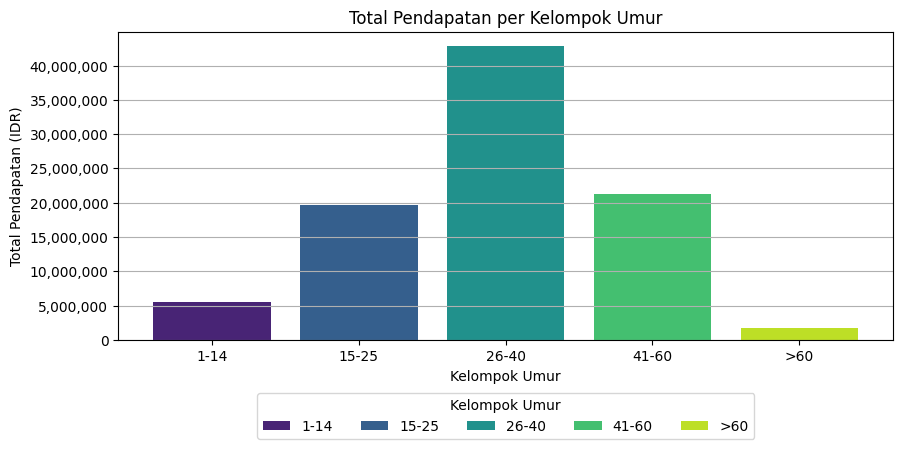

In [ ]:
# Membuat kolom untuk grup usia

bins = [1, 14, 25, 40, 60, 100]
labels = ['1-14', '15-25', '26-40', '41-60', '>60']

data['ageGroup'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

#Mengelompokkan data berdasarkan grup usia dan menghitung total revenue
age_group_revenue = data.groupby('ageGroup')['payAmount'].sum().reset_index()

#Mengganti nama kolom untuk kejelasan
age_group_revenue.columns = ['Age Group', 'Total Revenue']
age_group_revenue
#Mengganti nama kolom untuk kejelasan
age_group_revenue.columns = ['Age Group', 'Total Revenue']

#Visualisasi total revenue per grup usia dengan warna viridis dan grid horizontal
plt.figure(figsize=(10, 4))
colors = plt.cm.viridis([0.1, 0.3, 0.5, 0.7, 0.9, 1.0])
bars = plt.bar(age_group_revenue['Age Group'], age_group_revenue['Total Revenue'], color= colors)
plt.xlabel('Kelompok Umur')
plt.ylabel('Total Pendapatan (IDR)')
plt.title('Total Pendapatan per Kelompok Umur')
plt.grid(axis='y')

# Format the y-axis to show full numbers
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Menambahkan legend
plt.legend(bars, age_group_revenue['Age Group'], title="Kelompok Umur",  bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)

plt.show()